In [ ]:
#21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy?
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM classifier on the Iris dataset: {accuracy:.2f}")


Accuracy of the SVM classifier on the Iris dataset: 0.97


In [ ]:
#22.  Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

wine = datasets.load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Accuracy with Linear Kernel: {accuracy_linear:.2f}")
print(f"Accuracy with RBF Kernel:    {accuracy_rbf:.2f}")

if accuracy_linear > accuracy_rbf:
    print("Linear kernel performed better.")
elif accuracy_rbf > accuracy_linear:
    print("RBF kernel performed better.")
else:
    print("Both kernels performed equally well.")


Accuracy with Linear Kernel: 0.97
Accuracy with RBF Kernel:    1.00
RBF kernel performed better.


In [ ]:
#23 Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) of SVR on housing dataset: {mse:.4f}")


Mean Squared Error (MSE) of SVR on housing dataset: 0.3570


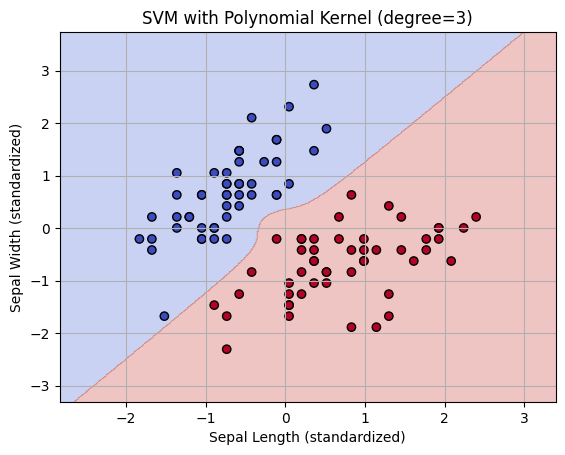

In [ ]:
#24.  Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary?
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X = X[y != 2]
y = y[y != 2]

scaler = StandardScaler()
X = scaler.fit_transform(X)

svm_clf = SVC(kernel='poly', degree=3, C=1.0)
svm_clf.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("SVM with Polynomial Kernel (degree=3)")
plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Sepal Width (standardized)")
plt.grid(True)
plt.show()


In [ ]:
#25 Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gaussian Naive Bayes on Breast Cancer dataset: {accuracy:.2f}")


Accuracy of Gaussian Naive Bayes on Breast Cancer dataset: 0.97


In [ ]:
#26 Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

X_train, X_test, y_train, y_test = train_test_split(
    newsgroups.data, newsgroups.target, test_size=0.2, random_state=42
)

vectorizer = CountVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_counts, y_train)

y_pred = nb_classifier.predict(X_test_counts)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Multinomial Naive Bayes on 20 Newsgroups dataset: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))


Accuracy of Multinomial Naive Bayes on 20 Newsgroups dataset: 0.68

Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.63      0.41      0.50       151
           comp.graphics       0.49      0.75      0.59       202
 comp.os.ms-windows.misc       0.69      0.05      0.09       195
comp.sys.ibm.pc.hardware       0.51      0.75      0.61       183
   comp.sys.mac.hardware       0.82      0.64      0.72       205
          comp.windows.x       0.69      0.81      0.74       215
            misc.forsale       0.87      0.65      0.75       193
               rec.autos       0.85      0.70      0.77       196
         rec.motorcycles       0.51      0.68      0.58       168
      rec.sport.baseball       0.94      0.78      0.85       211
        rec.sport.hockey       0.89      0.87      0.88       198
               sci.crypt       0.68      0.79      0.73       201
         sci.electronics       0.81      0.57    

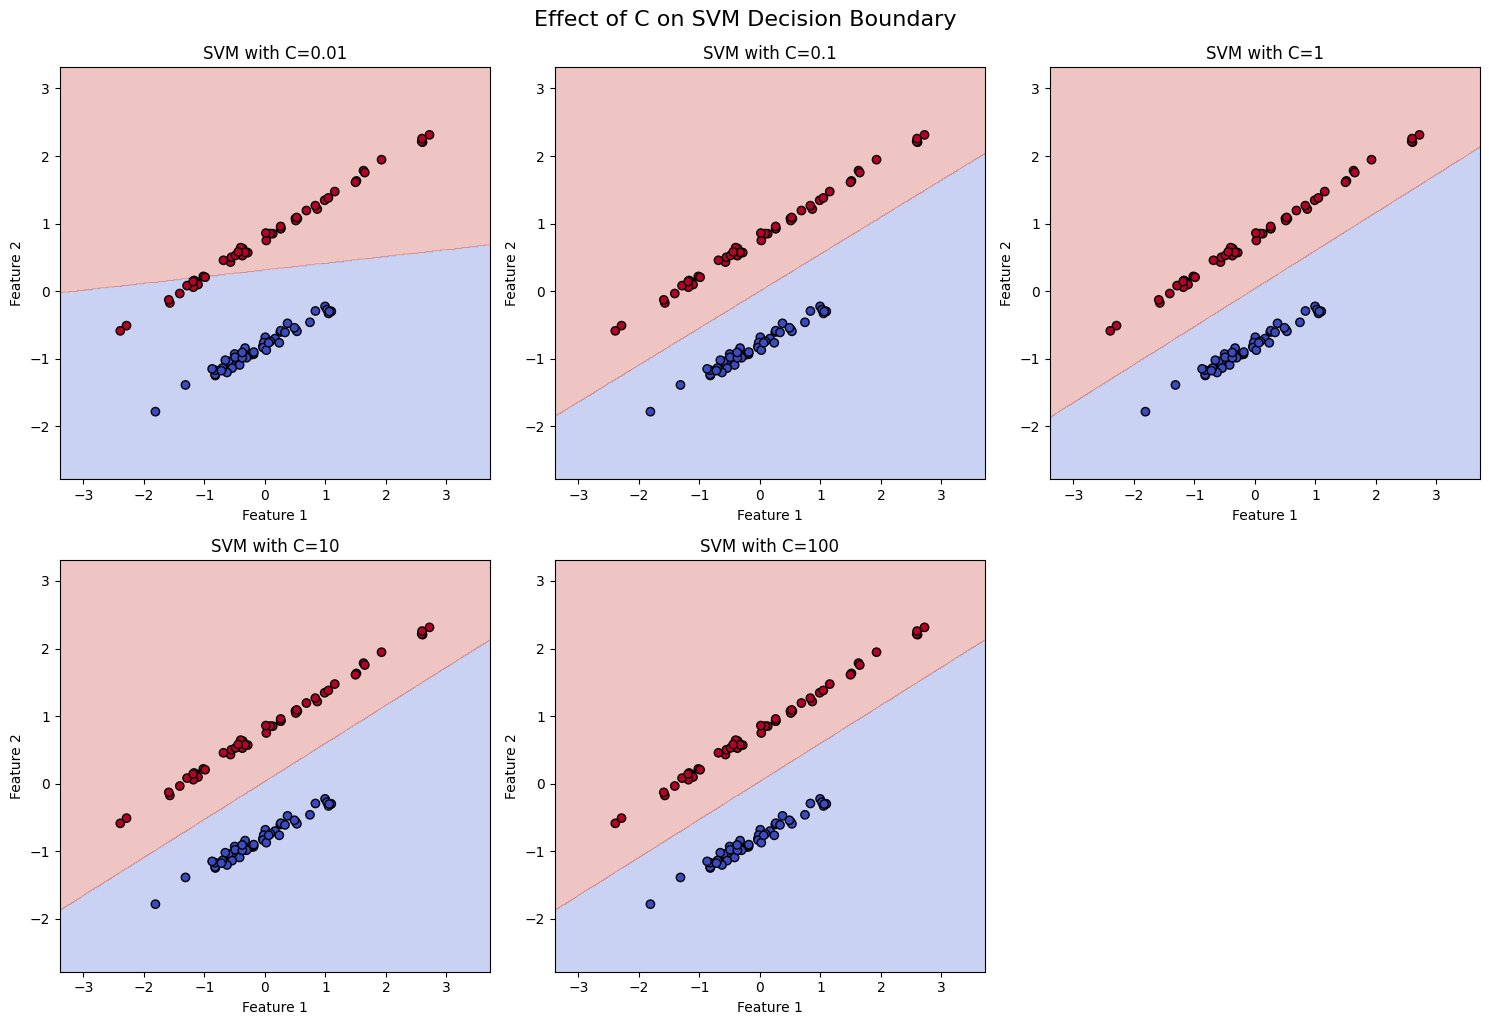

In [ ]:
#27 Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

scaler = StandardScaler()
X = scaler.fit_transform(X)

C_values = [0.01, 0.1, 1, 10, 100]

plt.figure(figsize=(15, 10))

for i, C in enumerate(C_values, 1):

    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(2, 3, i)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(f"SVM with C={C}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.tight_layout()
plt.suptitle("Effect of C on SVM Decision Boundary", fontsize=16, y=1.02)
plt.show()


In [ ]:
#28  Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with  binary features
import numpy as np
from sklearn.datasets import make_classification
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=5, n_classes=2, random_state=42)

X_binary = (X > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)

bnb = BernoulliNB()
bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.77

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       102
           1       0.77      0.74      0.76        98

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



In [ ]:
#29 Write a Python program to apply feature scaling before training an SVM model and compare results with  unscaled data
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_unscaled = SVC(kernel='rbf', C=1.0)
svm_unscaled.fit(X_train_raw, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test_raw)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

svm_scaled = SVC(kernel='rbf', C=1.0)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy without scaling: {accuracy_unscaled:.2f}")
print(f"Accuracy with scaling:    {accuracy_scaled:.2f}")


Accuracy without scaling: 0.95
Accuracy with scaling:    0.98


In [ ]:
#30 Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

categories = ['rec.sport.baseball', 'rec.sport.hockey']
data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data.data)
y = data.target
t
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_no_smoothing = MultinomialNB(alpha=0.0)
model_no_smoothing.fit(X_train, y_train)
y_pred_no_smoothing = model_no_smoothing.predict(X_test)
accuracy_no_smoothing = accuracy_score(y_test, y_pred_no_smoothing)

model_laplace = MultinomialNB(alpha=1.0)
model_laplace.fit(X_train, y_train)
y_pred_laplace = model_laplace.predict(X_test)
accuracy_laplace = accuracy_score(y_test, y_pred_laplace)

# --------- Compare Results ---------
print(f"Accuracy without Laplace Smoothing (alpha=0): {accuracy_no_smoothing:.2f}")
print(f"Accuracy with Laplace Smoothing (alpha=1):   {accuracy_laplace:.2f}")


Accuracy without Laplace Smoothing (alpha=0): 0.57
Accuracy with Laplace Smoothing (alpha=1):   0.92


/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


In [ ]:
#31 Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the SVM model
svm = SVC()

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get best estimator and evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Test Accuracy: 1.00

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
#32 Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Generate an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------- Without Class Weights -----------
svm_plain = SVC(kernel='rbf', C=1.0)
svm_plain.fit(X_train, y_train)
y_pred_plain = svm_plain.predict(X_test)

# ----------- With Class Weights -----------
svm_weighted = SVC(kernel='rbf', C=1.0, class_weight='balanced')
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)

# ----------- Evaluation -----------
print("Without Class Weights:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_plain):.2f}")
print(classification_report(y_test, y_pred_plain))

print("\nWith Class Weights (balanced):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_weighted):.2f}")
print(classification_report(y_test, y_pred_weighted))


Without Class Weights:
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       186
           1       1.00      1.00      1.00        14

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


With Class Weights (balanced):
Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       186
           1       0.78      1.00      0.88        14

    accuracy                           0.98       200
   macro avg       0.89      0.99      0.93       200
weighted avg       0.98      0.98      0.98       200



In [ ]:
#33 Write a Python program to implement a Naïve Bayes classifier for spam detection using email data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

df['label'] = df['label'].map({'ham': 0, 'spam': 1})

X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


Accuracy: 0.9847533632286996

Classification Report:
               precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       966
        Spam       0.96      0.92      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
#34 Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

data = datasets.load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
svm_clf = SVC(kernel='rbf', gamma='scale')
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_nb = accuracy_score(y_test, y_pred_nb)

print(f"SVM Accuracy: {acc_svm:.2f}")
print(f"Naive Bayes Accuracy: {acc_nb:.2f}")

print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


SVM Accuracy: 0.95
Naive Bayes Accuracy: 0.97

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
#35 Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare  results
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

data = datasets.load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_no_fs = nb.predict(X_test)
acc_no_fs = accuracy_score(y_test, y_pred_no_fs)

selector = SelectKBest(score_func=chi2, k=10)
X_train_fs = selector.fit_transform(X_train, y_train)
X_test_fs = selector.transform(X_test)

nb_fs = GaussianNB()
nb_fs.fit(X_train_fs, y_train)
y_pred_fs = nb_fs.predict(X_test_fs)
acc_fs = accuracy_score(y_test, y_pred_fs)

print(f"Accuracy without feature selection: {acc_no_fs:.2f}")
print(f"Accuracy with feature selection (k=10): {acc_fs:.2f}")

print("\nClassification report without feature selection:\n")
print(classification_report(y_test, y_pred_no_fs))

print("Classification report with feature selection:\n")
print(classification_report(y_test, y_pred_fs))


Accuracy without feature selection: 0.97
Accuracy with feature selection (k=10): 0.96

Classification report without feature selection:

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Classification report with feature selection:

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
#36 = Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

wine = datasets.load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

ovr_clf = OneVsRestClassifier(SVC(kernel='linear', random_state=42))
ovr_clf.fit(X_train, y_train)
y_pred_ovr = ovr_clf.predict(X_test)
acc_ovr = accuracy_score(y_test, y_pred_ovr)

ovo_clf = OneVsOneClassifier(SVC(kernel='linear', random_state=42))
ovo_clf.fit(X_train, y_train)
y_pred_ovo = ovo_clf.predict(X_test)
acc_ovo = accuracy_score(y_test, y_pred_ovo)

print(f"Accuracy with One-vs-Rest: {acc_ovr:.2f}")
print(f"Accuracy with One-vs-One: {acc_ovo:.2f}")


Accuracy with One-vs-Rest: 1.00
Accuracy with One-vs-One: 1.00


In [ ]:
#37 Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast  Cancer dataset and compare their accuracy
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = datasets.load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
svm_linear = SVC(kernel='linear', random_state=42)
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)

svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

acc_linear = accuracy_score(y_test, y_pred_linear)
acc_poly = accuracy_score(y_test, y_pred_poly)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Accuracy with Linear Kernel: {acc_linear:.2f}")
print(f"Accuracy with Polynomial Kernel: {acc_poly:.2f}")
print(f"Accuracy with RBF Kernel: {acc_rbf:.2f}")


Accuracy with Linear Kernel: 0.96
Accuracy with Polynomial Kernel: 0.95
Accuracy with RBF Kernel: 0.95


In [ ]:
#38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the  average accuracy
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

data = datasets.load_breast_cancer()
X, y = data.data, data.target

svm_clf = SVC(kernel='rbf', gamma='scale', random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(svm_clf, X, y, cv=skf, scoring='accuracy')

for i, score in enumerate(scores, 1):
    print(f"Fold {i} Accuracy: {score:.3f}")

print(f"\nAverage Accuracy: {np.mean(scores):.3f}")


Fold 1 Accuracy: 0.939
Fold 2 Accuracy: 0.877
Fold 3 Accuracy: 0.895
Fold 4 Accuracy: 0.939
Fold 5 Accuracy: 0.920

Average Accuracy: 0.914


In [ ]:
#39 from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

data = datasets.load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
priors_list = [
    None,
    [0.7, 0.3],
    [0.3, 0.7],
]

for i, priors in enumerate(priors_list, 1):
    nb = GaussianNB(priors=priors)
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Model {i} with priors={priors} => Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred, target_names=data.target_names))
    print("-" * 60)


Model 1 with priors=None => Accuracy: 0.974
              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        43
      benign       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

------------------------------------------------------------
Model 2 with priors=[0.7, 0.3] => Accuracy: 0.965
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

------------------------------------------------------------
Model 3 with priors=[0.3, 0.7] => Accuracy: 0.965
              precision    recall  f1-score   support

   malignant       1.00  

In [ ]:
#40.  Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = datasets.load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_no_rfe = svm.predict(X_test)
acc_no_rfe = accuracy_score(y_test, y_pred_no_rfe)

selector = RFE(estimator=SVC(kernel='linear', random_state=42), n_features_to_select=10)
X_train_rfe = selector.fit_transform(X_train, y_train)
X_test_rfe = selector.transform(X_test)

svm_rfe = SVC(kernel='linear', random_state=42)
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)
acc_rfe = accuracy_score(y_test, y_pred_rfe)

print(f"Accuracy without RFE: {acc_no_rfe:.3f}")
print(f"Accuracy with RFE (10 features): {acc_rfe:.3f}")


Accuracy without RFE: 0.956
Accuracy with RFE (10 features): 0.974


In [ ]:
#41 Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
data = datasets.load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
svm_clf = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Precision: 0.922
Recall: 1.000
F1-Score: 0.959

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
#42  Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

data = datasets.load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_prob = nb.predict_proba(X_test)
loss = log_loss(y_test, y_prob)
print(f"Log Loss (Cross-Entropy Loss): {loss:.4f}")


Log Loss (Cross-Entropy Loss): 0.2037


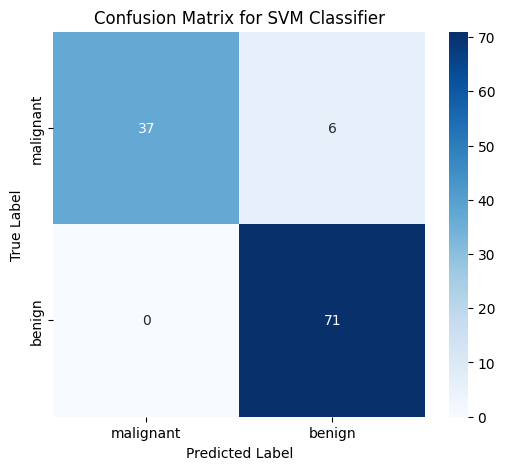

In [ ]:
#43 Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

data = datasets.load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

svm_clf = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()


In [ ]:
#44 Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

housing = fetch_california_housing()
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")


Mean Absolute Error (MAE): 0.860


ROC-AUC Score: 0.998


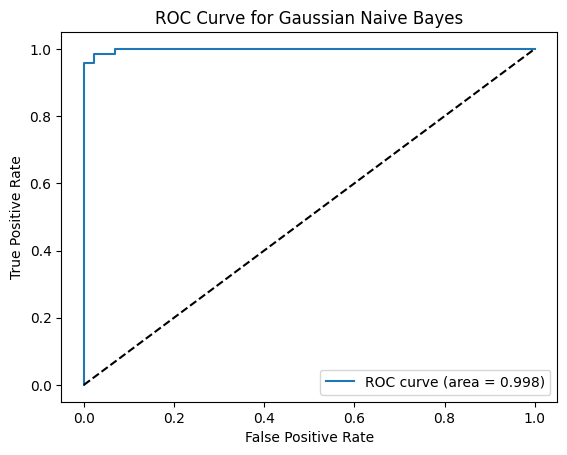

In [ ]:
#45  Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC  score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

data = datasets.load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_prob = nb.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.show()


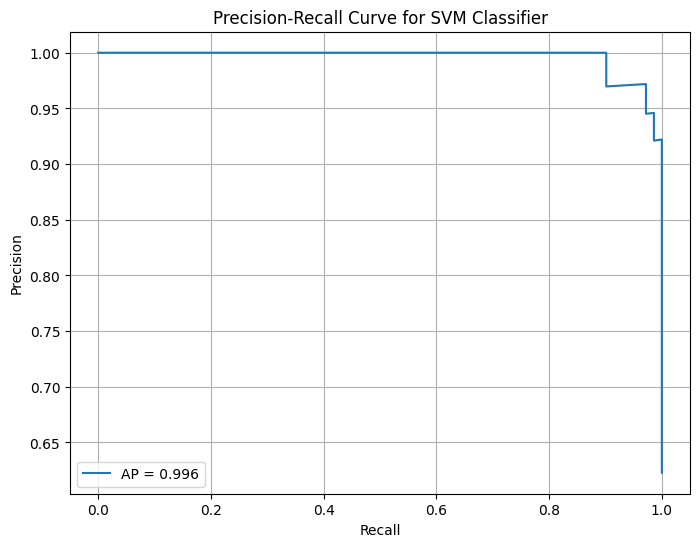

In [ ]:
#46 Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

data = datasets.load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

y_scores = svm_clf.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'AP = {avg_precision:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM Classifier')
plt.legend()
plt.grid(True)
plt.show()
